In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files = "/kaggle/input/plants-classification/train"
test_files = "/kaggle/input/plants-classification/test"
valid_files = "/kaggle/input/plants-classification/val"


print("Number of images in training set", total_files(train_files))
print("Number of images in test set", total_files(test_files))
print("Number of images in val set", total_files(valid_files))


Number of images in training set 1
Number of images in test set 1
Number of images in val set 1


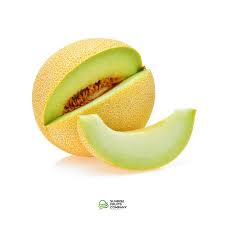

In [3]:
from PIL import Image
import IPython.display as display

image_path = '/kaggle/input/plants-classification/train/cantaloupe/cantaloupe0.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory('/kaggle/input/plants-classification/train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 21000 images belonging to 30 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory('/kaggle/input/plants-classification/test',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 6000 images belonging to 30 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729917747.414424     120 service.cc:145] XLA service 0x7c0e20005330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729917747.414493     120 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729917747.414499     120 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/657 ━━━━━━━━━━━━━━━━━━━━ 1:58:52 11s/step - accuracy: 0.0625 - loss: 3.4143

I0000 00:00:1729917751.886558     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


657/657 ━━━━━━━━━━━━━━━━━━━━ 451s 671ms/step - accuracy: 0.1495 - loss: 3.1883 - val_accuracy: 0.3377 - val_loss: 2.3095
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 270s 407ms/step - accuracy: 0.3411 - loss: 2.2435 - val_accuracy: 0.3777 - val_loss: 2.1411
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 274s 413ms/step - accuracy: 0.4214 - loss: 1.9684 - val_accuracy: 0.4533 - val_loss: 1.9264
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 272s 409ms/step - accuracy: 0.4851 - loss: 1.7618 - val_accuracy: 0.4775 - val_loss: 1.8929
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 272s 409ms/step - accuracy: 0.5335 - loss: 1.5811 - val_accuracy: 0.5053 - val_loss: 1.7913
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 270s 407ms/step - accuracy: 0.5748 - loss: 1.4349 - val_accuracy: 0.5308 - val_loss: 1.7426
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 271s 408ms/step - accuracy: 0.6205 - loss: 1.2765 - val_accuracy: 0.5483 - val_loss: 1.7339
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 270s 406ms/step - accuracy: 0.6383 - loss: 1.19

In [16]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 278s 419ms/step - accuracy: 0.8683 - loss: 0.3850 - val_accuracy: 0.6153 - val_loss: 2.6403
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 275s 414ms/step - accuracy: 0.8715 - loss: 0.3851 - val_accuracy: 0.6227 - val_loss: 2.6152
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 301s 454ms/step - accuracy: 0.8710 - loss: 0.3626 - val_accuracy: 0.6162 - val_loss: 2.5537
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 303s 457ms/step - accuracy: 0.8711 - loss: 0.3807 - val_accuracy: 0.6185 - val_loss: 2.8495
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 294s 443ms/step - accuracy: 0.8751 - loss: 0.3586 - val_accuracy: 0.6213 - val_loss: 2.6651


In [14]:
model.save('plant_ident.h5')